### Homework Section 3

**Exercise 3 (p.198, Chap.5)**

a) Explain how k-fold cross-validation is implemented.

b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:
i. The validation set approach?
ii. LOOCV?

a) The set of observations is randomly divided into k groups of approx. equal size. The first fold is assumed as the validation set and the method is fit on the remaining k-1 groups. The Mean Square Error is then computed on the first fold. The procedure is repeated k times and each time a different group is held as the validation set. Resulting then in k MSE, we compute the average of these MSE to obtain the K fold Cross Validation.

b) 

i. The drawback of validation set is that the test error can be highly variable, based on the selected validation portion of the observations, whereas the k-fold takes the average of the k groups generated, therefore a more precise MSE is obtained. The advantage of the validation set is that it is simple to implement and interpret.

ii. The advantage of K-fold over LOOCV is computational saving, since the method is not necessary to be fitted n times. In addition, it often gives more accurate estimates of the test error rate than does LOOCV

**Exercise 8 (p.200, Chap.5)** 


In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

(b) Create a scatterplot of X against Y . Comment on what you find.

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i. Y = β0 + β1X + ǫ

ii. Y = β0 + β1X + β2X2 + ǫ

iii. Y = β0 + β1X + β2X2 + β3X3 + ǫ

iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

(f) Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [1]:
 # (a) Generate a simulated data set as follows:
set.seed (1)
x <- rnorm (100)
y <- x-2* x^2+ rnorm (100)

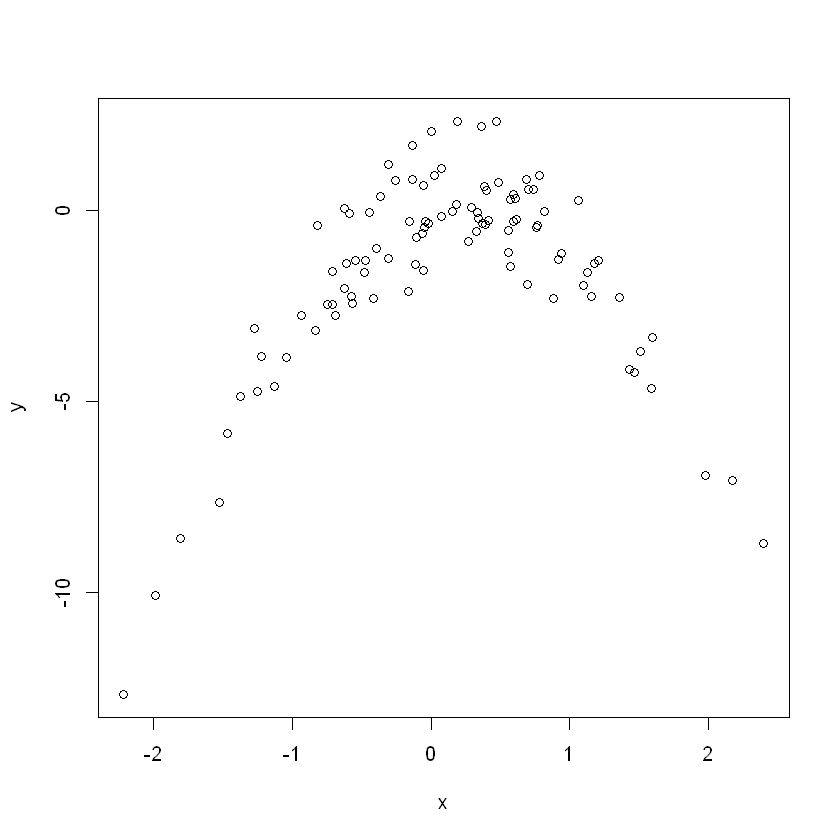

In [2]:
plot(x,y)
# We can observe a scatter plot trending to have a polynomial shape 

In [7]:
library(boot)
set.seed(1)
df = data.frame(x, y)
# Y = β0 + β1X + ǫ
model = glm(y ~ x)
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + ǫ
model = glm(y ~ poly(x, 2))
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + β3X3 + ǫ
model = glm(y ~ poly(x, 3))
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.
model = glm(y ~ poly(x, 4))
cv.glm(df, model)$delta

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

In [9]:
set.seed(300)
df = data.frame(x, y)
# Y = β0 + β1X + ǫ
model = glm(y ~ x)
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + ǫ
model = glm(y ~ poly(x, 2))
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + β3X3 + ǫ
model = glm(y ~ poly(x, 3))
cv.glm(df, model)$delta
# Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.
model = glm(y ~ poly(x, 4))
cv.glm(df, model)$delta

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

The results are the same because the LOOCV evaluates a single observation from all other observations 

In [10]:
summary(model)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


Results match the conclusion of the CV results because the p values with statistical significance correspond to the ones thrown by the CV

**Exercise 1 (p.259, Chap.6)**

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2, . . . , p predictors. Explain your answers:


**(a) Which of the three models with k predictors has the smallest
training RSS?** 
Since best subset does not take into account the k value to iterate it has the smallest training RSS 

**(b) Which of the three models with k predictors has the smallest
test RSS?**

Due to the fact that best subset considers more models than the other approaches it might has the smallest test RSS, although it does not necesarilly has the most accurate results. 

**(c) True or False:** 

i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection. **True**

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection. **True**

iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.**False** 

iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.**False**

v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.**False**

**Exercise 9 (p.263, Chap.6)**

In this exercise, we will predict the number of applications received using the other variables in the College data set.

(a) Split the data set into a training set and a test set.

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?

In [1]:
library(ISLR)
set.seed(123)

In [2]:
split <- sample(c(rep(0, 0.7 * nrow(College)), rep(1, 0.3 * nrow(College))))


In [10]:
# Split the data
train_dt <- College[split == 0, ]   
test_dt <- College[split==1, ]

In [11]:
# Fit linear regression model
linear_md = lm(Apps~., data= train_dt)
linear_predict = predict(linear_md, test_dt)
# Test error
mean((test_dt[, "Apps"] - linear_predict)^2)

[1] 1306770

In [12]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [14]:
# Ridge Regression
matrix_train = model.matrix(Apps~., data=train_dt)
matrix_test = model.matrix(Apps~., data=test_dt)
grid = 10 ^ seq(4, -2, length=100)
ridge_md = cv.glmnet(matrix_train, train_dt[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
best_lambda = ridge_md$lambda.min
best_lambda

[1] 0.01

In [17]:
ridge_predict = predict(ridge_md, newx=matrix_test, s=best_lambda)
mean((test_dt[, "Apps"] - ridge_predict)^2)

[1] 1306733

In [18]:
lasso_md = cv.glmnet(matrix_train, train_dt[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
best_lasso_lmb = lasso_md$lambda.min
best_lasso_lmb

[1] 0.01

In [19]:
lasso_predict = predict(lasso_md, newx=matrix_test, s=best_lambda)
mean((test_dt[, "Apps"] - ridge_predict)^2)

[1] 1306733

In [20]:
lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(lasso, s=best_lasso_lmb, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -471.39372069
(Intercept)    .         
PrivateYes  -491.04485135
Accept         1.57033288
Enroll        -0.75961467
Top10perc     48.14698891
Top25perc    -12.84690694
F.Undergrad    0.04149116
P.Undergrad    0.04438973
Outstate      -0.08328388
Room.Board     0.14943472
Books          0.01532293
Personal       0.02909954
PhD           -8.39597537
Terminal      -3.26800340
S.F.Ratio     14.59298267
perc.alumni   -0.04404771
Expend         0.07712632
Grad.Rate      8.28950241

In [22]:
install.packages("pls")
library(pls)

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\RtmpuQpME9\downloaded_packages



Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




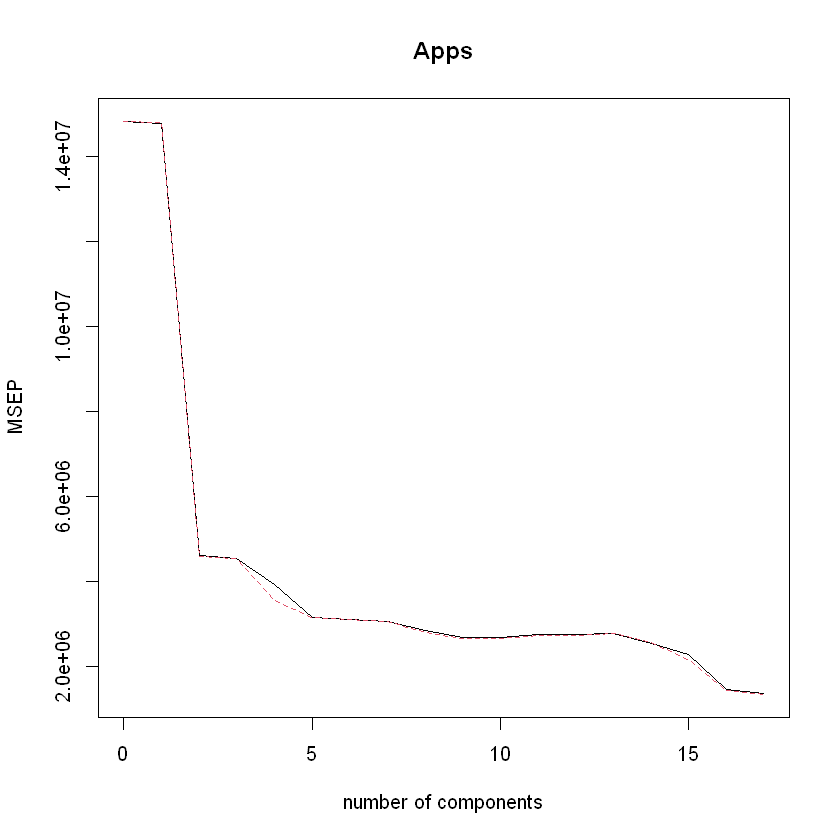

In [26]:
pcr_fit = pcr(Apps~., data=train_dt, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [27]:
pcr_pred = predict(pcr_fit, test_dt, ncomp=10)
mean((test_dt[, "Apps"] - data.frame(pcr_pred))^2)

Warning message in mean.default((test_dt[, "Apps"] - data.frame(pcr_pred))^2):
"argument is not numeric or logical: returning NA"


[1] NA

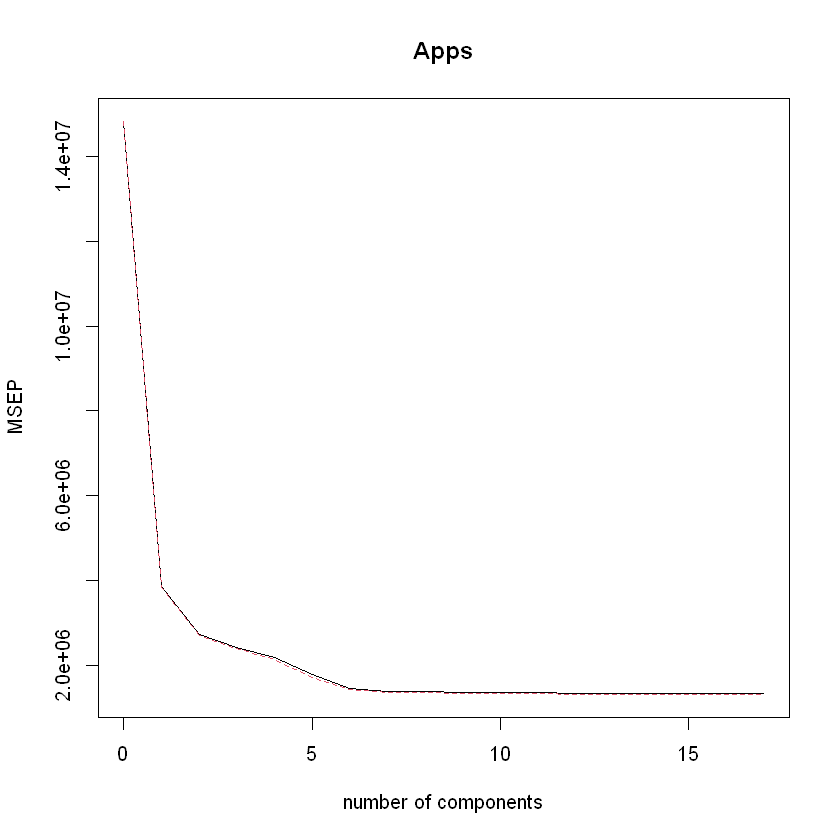

In [33]:
pls_fit = plsr(Apps~., data=train_dt, scale=T, validation="CV")
validationplot(pls_fit, val.type="MSEP")

In [40]:
pls_pred = predict(pls_fit, test_dt, ncomp=10)
mean((test_dt[, "Apps"] - data.frame(pls_pred))^2)

Warning message in mean.default((test_dt[, "Apps"] - data.frame(as.double(pls_pred)))^2):
"argument is not numeric or logical: returning NA"


[1] NA

In [38]:
mean(data.frame(pls_pred))

Warning message in mean.default(data.frame(pls_pred)):
"argument is not numeric or logical: returning NA"


[1] NA